1. Загрузите данные из файла churn-bigml-80.csv
Проведите базовый осмотр данных.
сколько строк, сколько столбцов, есть ли пустые значения?

определите общее количество абонентов отказавшихся от обслуживания (переменная Churn)

Исследуйте зависимость целевой переменной Churn 
от переменных 
Voice mail plan
International plan
Customer service calls



Сформулируйте гипотезы о зависимости.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [ ]:
df = pd.read_csv('drive/MyDrive/ColabNotebooks/Homeworks/Data/churn-bigml-80.csv')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape[0] # row

2666

In [ ]:
df.shape[1] # columns

20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
df[df['Churn'] == True].shape[0] # отказались от обслуживания

388

In [ ]:
df_1 = (df[['International plan', 'Voice mail plan', 'Customer service calls', 'Churn']])

In [ ]:
df_1

,International plan,Voice mail plan,Customer service calls,Churn
0,No,Yes,1,False
1,No,Yes,1,False
2,No,No,0,False
3,Yes,No,2,False
4,Yes,No,3,False
...,...,...,...,...
2661,No,No,2,False
2662,No,Yes,2,False
2663,No,No,3,False
2664,No,No,2,False


array([[<AxesSubplot:title={'center':'Customer service calls'}>]],
      dtype=object)

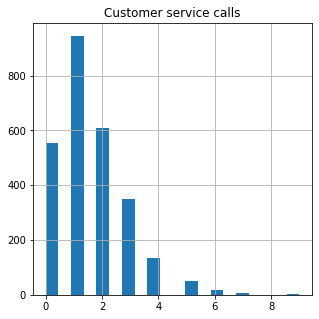

In [ ]:
df_1.hist(bins = 20, figsize = (5,5))

In [ ]:
df_1['International plan'].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

In [ ]:
df_1['Voice mail plan'].value_counts()

No     1933
Yes     733
Name: Voice mail plan, dtype: int64

In [ ]:
dict = {'Yes': 1, 'No': 0}

In [1]:
df_1['International plan'] = df_1['International plan'].map(dict)

NameError: ignored

In [ ]:
df_1['Voice mail plan'] = df_1['Voice mail plan'].map(dict)

array([[<AxesSubplot:title={'center':'International plan'}>,
        <AxesSubplot:title={'center':'Voice mail plan'}>],
       [<AxesSubplot:title={'center':'Customer service calls'}>,
        <AxesSubplot:>]], dtype=object)

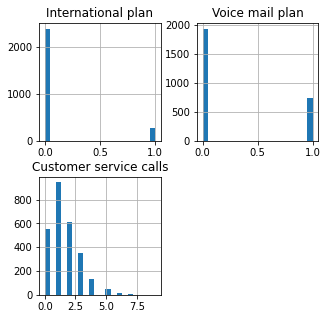

In [ ]:
df_1.hist(bins = 20, figsize = (5,5))

In [ ]:
df_1.corr()

,International plan,Voice mail plan,Customer service calls,Churn
International plan,1.000000,0.002131,-0.035955,0.277489
Voice mail plan,0.002131,1.000000,-0.022054,-0.099291
Customer service calls,-0.035955,-0.022054,1.000000,0.202590
Churn,0.277489,-0.099291,0.202590,1.000000


In [ ]:
df_1.corr()['Churn']

International plan        0.277489
Voice mail plan          -0.099291
Customer service calls    0.202590
Churn                     1.000000
Name: Churn, dtype: float64